# FIT1043 Introduction to Data Science 
## Assignment 2

Author: Yu Heng Seow

Student ID: 34329293

## Introduction
The main purpose of this report is to learn both supervised and unsupervised learning, build classification models, predict the outputs using the model. The report comprised of the following sections:

<b> A1: Supervised learning</b>
1. Explain supervised machine learning, the notion of labelled data, and train and test datasets.
2. Read the dataset and separate the features and the label
3. split the data for training and testing.

<b>A2. Classification (training) </b>
1. Explain the difference(s) between binary and multi-class classification.
2. In preparation for classification, your data should be normalised/scaled.
    a. Describe what you understand from this need to normalise data.
    b. Choose and use the appropriate normalisation functions available in sklearn.preprocessing and scale the data appropriately.
3. Use the Support Vector Machine algorithm to build the model.
    a. Describe SVM.
    b. Explain the kernel in SVM.
    c. Write the code to build a predictive SVM model using the training dataset.
4. Repeat Task A2.3.c by using another classification algorithm instead of SVM.

<b>A3. Classification (prediction)</b>
1. Using the testing dataset you created in Task A1.3 above, conduct the predictions using the models built.
2. Display the confusion matrices.
3. Compare the performance of SVM and your other classifier and provide your justification of which one performed better. 

<b>A4. Independent evaluation</b>
1. Read the ‘FIT1043-MusicGenre-Submission.csv’ file and use the best model you built earlier to predict the ‘music_genre’ for the songs in this file.
2. predict the 'music_genre' and submit the predictions along with other required submission files.

<b>A5. Kaggle Competition</b>
1. The submission is submitted to kaggle.com with the file name '34329293-YuHengSeow-v1.csv'

<b>B1. Selection of a Dataset with missing data, Clustering</b>
1. Select a suitable dataset that contains some missing data and at least two numerical features with direct link and alternative download link at Google Drive.
2. Perform k-means clustering, choosing two numerical features in the dataset, and apply k-means clustering to the data to create k clusters in Python (k>=2)
3. Visualise the data as well as the results of the k-means clustering, and describe the findings about the identified clusters.

In [1]:
# filter all the warnings so that the warnings won't show in the notebook
import warnings
warnings.filterwarnings('ignore')

### A1: Supervised Learning
#### 1. Explain supervised machine learning, the notion of labelled data, and train and test datasets

###### Answer:
1. Supervised machine learning, in shorts, is a type of machine learning where the model is trained on labelled data. It is called 'supervised' because the process of the machine learning is guided or 'supervised' by the labelled data, which is a type of data that has a input and output pairs.

2. Labelled data is a type of data consists of input-output pairs where the expected output is provided for each input during the machine learning phase. For example, a salary predictor is being trained by a set of data containing the age (input) and their respective salary (output). 

3. Train datasets is a subset of the data we collected and is used to fit the model during the training phase. The train datasets is fed to the model with the input-output pairs and the model is adjusted to minimize the error and the differnece the predicted output and the actual output.

4. Test datasets is a subset of the data we collected and is used to test the model we trained to find out its performace. The training data set is kept separate from the training dataset. After the model has been trained, it is evaluated on the test dataset to assess its performace on unseen data by calculating its error, accuracy, etc. This evaluation helps to estimate how well the model generalize to new and unseen examples.

#### 2. Read the ‘FIT1043-MusicGenre-Dataset.csv’ file and separate the features and the label

In [2]:
# import necceesary library
import pandas as pd

In [3]:
A_main_df = pd.read_csv("C:/Users/seowy/Downloads/1043 Assignment 2/FIT1043-MusicGenre-Dataset.csv")
A_main_df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,77382,Sheena Ringo,獣ゆく細道,48,0.01340,0.423,224053,0.799,0.000004,0.1470,-4.227,0.0447,124.626,0.5560,1
1,23554,empty_field,Fossil Roo,22,0.86200,0.590,151067,0.221,0.468000,0.0736,-16.338,0.0383,129.984,0.0331,1
2,82886,The Beatles,Dear Prudence - 2018 Mix,62,0.09040,0.395,234973,0.538,0.000453,0.0685,-10.300,0.0456,150.785,0.3690,9
3,37772,Pink Floyd,Have a Cigar,64,0.40700,0.454,307733,0.650,0.049800,0.5890,-10.191,0.0437,120.154,0.7200,9
4,80191,A-Trak,Push,43,0.00145,0.642,213512,0.877,0.002790,0.0984,-2.878,0.0450,126.058,0.4960,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,70328,Tosca,Swimswimswim,57,0.01400,0.903,252245,0.545,0.004920,0.2240,-7.761,0.0380,120.017,0.9560,5
25954,65621,Wolfgang Amadeus Mozart,"Requiem in D Minor, K. 626: II. Kyrie eleison ...",13,0.99300,0.275,179240,0.409,0.825000,0.2150,-16.666,0.0322,77.858,0.2250,3
25955,82975,Elmore James,Dust My Broom,43,0.01150,0.507,175040,0.660,0.336000,0.3220,-4.957,0.0306,100.783,0.6960,2
25956,36145,Wiz Khalifa,True Colors (feat. Nicki Minaj),50,0.00451,0.805,255147,0.744,0.000000,0.3500,-6.020,0.0572,124.983,0.5190,6


In [4]:
A_main_df.columns.to_list()

['instance_id',
 'artist_name',
 'track_name',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'music_genre']

###### Answer:
The cell above shows all the columns of the dataset. The possible features and label are as stated below:

<b>Features:</b>
1. 'artist_name'
2. 'popularity'
3. 'acousticness'
4. 'danceability'
5. 'energy'
6. 'instrumentalness'
7. 'liveness'
8. 'loudness'
9. 'speechiness'
10. 'tempo'
11. 'valence'

<b>Label: </b>'music_genre'

* The 'instance_id' is just an ID to indicate the index of the instance recorded in the dataset and thus not taken as a features.
* The 'artist_name' could be treated as a features because the same artist might release music or songs with less diversity in music genre.
* The 'track_name' laccks inherent genre information and can be inconsistent due to the language and cultural variations
* The 'duration_ms' could be inconsistent and does not capture crucial musical charateristics 
* The 'liveness' does does not directly related to music genre as some artist might not offer live performance.

In [5]:
features = A_main_df.drop(['instance_id', 'track_name', 'duration_ms', 'liveness', 'music_genre'],axis=1)
features_columns = features.columns
features

,artist_name,popularity,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
0,Sheena Ringo,48,0.01340,0.423,0.799,0.000004,-4.227,0.0447,124.626,0.5560
1,empty_field,22,0.86200,0.590,0.221,0.468000,-16.338,0.0383,129.984,0.0331
2,The Beatles,62,0.09040,0.395,0.538,0.000453,-10.300,0.0456,150.785,0.3690
3,Pink Floyd,64,0.40700,0.454,0.650,0.049800,-10.191,0.0437,120.154,0.7200
4,A-Trak,43,0.00145,0.642,0.877,0.002790,-2.878,0.0450,126.058,0.4960
...,...,...,...,...,...,...,...,...,...,...
25953,Tosca,57,0.01400,0.903,0.545,0.004920,-7.761,0.0380,120.017,0.9560
25954,Wolfgang Amadeus Mozart,13,0.99300,0.275,0.409,0.825000,-16.666,0.0322,77.858,0.2250
25955,Elmore James,43,0.01150,0.507,0.660,0.336000,-4.957,0.0306,100.783,0.6960
25956,Wiz Khalifa,50,0.00451,0.805,0.744,0.000000,-6.020,0.0572,124.983,0.5190


In [6]:
label = A_main_df['music_genre']
label

0        1
1        1
2        9
3        9
4        5
        ..
25953    5
25954    3
25955    2
25956    6
25957    8
Name: music_genre, Length: 25958, dtype: int64

#### 3. Use the sklearn.model_selection.train_test_split function to split your data for training and testing.

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label) 

In [8]:
x_train

,artist_name,popularity,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
329,Michael Lington,45,0.091300,0.562,0.830,0.786000,-5.975,0.0324,98.857,0.4510
24205,Austin Wintory,13,0.854000,0.272,0.144,0.510000,-22.634,0.0353,89.946,0.0377
3582,The Tymes,38,0.819000,0.538,0.484,0.000027,-10.308,0.0365,75.656,0.4190
11833,Peter Frampton,65,0.445000,0.480,0.781,0.000041,-5.687,0.0305,142.873,0.4950
755,Crazy P,46,0.000535,0.714,0.816,0.339000,-6.818,0.0330,114.991,0.3350
...,...,...,...,...,...,...,...,...,...,...
1708,Breaking Benjamin,54,0.000028,0.423,0.818,0.000338,-3.603,0.1020,171.039,0.4960
2610,Smokepurpp,52,0.033400,0.762,0.543,0.000000,-10.710,0.0878,86.027,0.5040
20882,Mustard,54,0.095500,0.496,0.560,0.000000,-7.702,0.4180,86.104,0.4410
946,Photek,36,0.636000,0.560,0.328,0.913000,-23.116,0.0464,130.079,0.1500


In [9]:
y_train

329      7
24205    1
3582     2
11833    9
755      5
        ..
1708     0
2610     6
20882    8
946      5
4741     7
Name: music_genre, Length: 19468, dtype: int64

In [10]:
x_test

,artist_name,popularity,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
13135,empty_field,64,0.069700,0.733,0.6760,0.000000,-5.655,0.0432,97.448,0.7010
23982,Andrea Bocelli,46,0.881000,0.188,0.3260,0.005390,-9.702,0.0371,81.570,0.0881
3749,The Gun Club,41,0.000326,0.452,0.8970,0.000042,-8.763,0.0754,120.849,0.6170
17238,Tyler Farr,56,0.004450,0.614,0.8050,0.000030,-5.340,0.0439,80.020,0.6910
3175,Cafe Jazz Deluxe,44,0.969000,0.679,0.0856,0.943000,-22.087,0.0658,87.794,0.5630
...,...,...,...,...,...,...,...,...,...,...
1604,Drake,70,0.070500,0.670,0.5150,0.000000,-6.977,0.3970,122.006,0.4220
14740,Savage Garden,64,0.307000,0.556,0.5170,0.001150,-8.769,0.0287,169.938,0.7790
16568,Eric Whitacre,47,0.991000,0.150,0.0969,0.310000,-20.803,0.0425,81.014,0.0361
18346,Young M.A,66,0.802000,0.735,0.7150,0.001960,-3.777,0.1130,83.028,0.5980


In [11]:
y_test

13135    8
23982    3
3749     2
17238    9
3175     7
        ..
1604     6
14740    9
16568    3
18346    8
23180    9
Name: music_genre, Length: 6490, dtype: int64

#### A2 Classification (Training)
##### 1. Explain the difference(s) between binary and multi-class classification.


###### Answer
The differences between binary and multi-class classification are as stated below:
1. <b>The number of classes (outputs): <br/></b>
Binary classification comprises only two classes, whereas multiclass classification includes more than two classes. 
2. <b>Boundaries: <br/></b>
Binary classifiers use a single decision boundary to divide data into two classes, but multiclass classifiers require more complex decision boundaries.
2. <b>Output Representation: <br/></b>
In binary classification, the output typically reflects the likelihood of belonging to a single class (class 1 or class 0). In multiclass classification, the output indicates the probabilities of belonging to each class, and the predicted class is chosen based on the highest probability.



#### 2. In preparation for classification, your data should be normalised/scaled.
#####  b. Describe what you understand from this need to normalise data.

###### Answer
Feature scaling or normalization is applied when features have a wide range of values. Using raw values can lead to bias in machine learning algorithms towards features with larger magnitudes. For instance, property prices might range from 100K to 1M, while stock prices might range from 10 to 1K. In an occupation predictor model, without scaling, the algorithm might bias towards individuals with more expensive property rather than those with higher stock prices.

##### b. Choose and use the appropriate normalisation functions available in sklearn.preprocessing and scale the data appropriately.

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# the 'artist_name' column stores string data and is not scalable thus excluded from scaling for further encode
features_to_scale = features_columns[1:]
sc.fit(x_train[features_to_scale])
x_train[features_to_scale] = sc.transform(x_train[features_to_scale])
x_test[features_to_scale] = sc.transform(x_test[features_to_scale])

In [13]:
x_train

,artist_name,popularity,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
329,Michael Lington,0.051688,-0.628200,0.017598,0.866350,1.854903,0.512676,-0.600770,-0.693115,-0.032561
24205,Austin Wintory,-2.010464,1.608461,-1.602287,-1.724095,1.007983,-2.189785,-0.572355,-0.983244,-1.694931
3582,The Tymes,-0.399408,1.505821,-0.116461,-0.440201,-0.556894,-0.190233,-0.560597,-1.448506,-0.161271
11833,Peter Frampton,1.340533,0.409045,-0.440438,0.681318,-0.556851,0.559396,-0.619387,0.739981,0.144415
755,Crazy P,0.116130,-0.894373,0.866641,0.813484,0.483261,0.375923,-0.594891,-0.167816,-0.499135
...,...,...,...,...,...,...,...,...,...,...
1708,Breaking Benjamin,0.631668,-0.895861,-0.758829,0.821036,-0.555940,0.897468,0.081194,1.657025,0.148437
2610,Smokepurpp,0.502784,-0.797995,1.134760,-0.217408,-0.556977,-0.255446,-0.057943,-1.110841,0.180615
20882,Mustard,0.631668,-0.615883,-0.351065,-0.153213,-0.556977,0.232519,3.177465,-1.108334,-0.072783
946,Photek,-0.528292,0.969164,0.006426,-1.029282,2.244609,-2.267976,-0.463593,0.323427,-1.243239


In [14]:
x_test

,artist_name,popularity,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
13135,empty_field,1.276091,-0.691543,0.972771,0.284821,-0.556977,0.564588,-0.494948,-0.738990,0.972985
23982,Andrea Bocelli,0.116130,1.687640,-2.071494,-1.036834,-0.540438,-0.091926,-0.554718,-1.255954,-1.492213
3749,The Gun Club,-0.206081,-0.894986,-0.596841,1.119353,-0.556849,0.060401,-0.179442,0.022912,0.635122
17238,Tyler Farr,0.760553,-0.882892,0.308060,0.771946,-0.556886,0.615688,-0.488089,-1.306420,0.932763
3175,Cafe Jazz Deluxe,-0.012754,1.945705,0.671138,-1.944623,2.336665,-2.101049,-0.273506,-1.053310,0.417924
...,...,...,...,...,...,...,...,...,...,...
1604,Drake,1.662744,-0.689197,0.620865,-0.323140,-0.556977,0.350130,2.971700,0.060582,-0.149205
14740,Savage Garden,1.276091,0.004353,-0.015917,-0.315588,-0.553448,0.059427,-0.637024,1.621178,1.286716
16568,Eric Whitacre,0.180573,2.010221,-2.283755,-1.901952,0.394273,-1.892756,-0.501807,-1.274057,-1.701366
18346,Young M.A,1.404975,1.455968,0.983943,0.432092,-0.550963,0.869241,0.188975,-1.208484,0.558700


#### 3. Use the Support Vector Machine algorithm to build the model.
##### a. Describe SVM. Again, this is not in your lecture content, you need to do some self-learning.

###### Answer:
Support Vector Machine (SVM) is a popular supervised learning algorithm used for classification tasks. It works by finding the optimal hyperplane that best separates data points belonging to different classes, maximizing the margin between the classes. SVM is particularly useful when dealing with high-dimensional data and nonlinear relationships between features. It achieves this by employing kernel functions to map the data into higher-dimensional spaces where linear separation is possible. 

<b>Glossary:</b>
1. hyperplane: a decision boundary that separates classes in the feature space. It's like a flat surface that divides data points, maximizing the margin between classes. While it's easy to visualize in lower dimensions (like a line in 2D), in higher dimensions, it's a multidimensional entity ensuring precise classification.
2. margin: distance between the hyperplane and the nearest data points of each class. Maximizing its ensures a robust classification boundary.
3. kernel function: explained in next question

##### b. In SVM, there is something called the kernel. Explain what you understand from it.

###### Answer:
A kernel function is a mathematical function that computes the similarity between pairs of data points in a higher-dimensional space. Kernel functions are used to map the original input data into a higher-dimensional feature space, where the data might become linearly separable, even if it wasn't in the original space.

It plays a crucial role in avoiding the explicit computation of coordinates in higher dimensional spaces, which can be computationally expensive. Kernel functions efficiently compute the inner products between data points  in the higher-dimensional space without needing to represent the space explicitly. This approach allows SVM to effectively capture complex relationships in the data and create non-linear decision boundaries.


<b>Common kernel functions used in SVM include: </b>
1. Linear Kernel: Computes the inner product of the original features.
2. Polynomial Kernel: Computes the similarity between data points as a polynomial function of the original features.
3. Radial Basis Function (RBF) Kernel: Also known as Gaussian Kernel, measures the similarity using the Gaussian radial basis function.
4. Sigmoid kernel: This kernel function is based on the hyperbolic tangent function and is often used in neural network applications.

##### c. Write the code to build a predictive SVM model using your training dataset.

In [15]:
# the feature 'artist_name' does not suitable for svm model training and thus is excluded temporarily. 
svc_features_columns = features_to_scale

Here I use Grid Search Cross Validation to find the best model and its parameter for both task A3.C (SVM classification model training) and A4 (other classification model training)

In [16]:
# import grid search cross validation and svc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Define the svc parameter grid for GridSearchCV
svc_param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf']} 
# Initialize GridSearchCV and tune the parameter for SVM classifier
svc_grid = GridSearchCV(estimator=SVC(), param_grid=svc_param_grid, refit = True, verbose = 3) 
svc_grid.fit(x_train[svc_features_columns], y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time=  23.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.490 total time=  24.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.487 total time=  25.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.489 total time=  24.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.475 total time=  24.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.552 total time=  15.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.542 total time=  15.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.535 total time=  15.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.541 total time=  15.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.533 total time=  15.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.505 total time=  18.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

Best Parameters for SVM Classifier

In [17]:
svc_grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Model Trained for SVM Classifier 

In [18]:
svc = svc_grid.best_estimator_
svc

SVC(C=10, gamma=0.1)

#### 4. Repeat Task A2.3.c by using another classification algorithm such as Decision Tree or Random Forest algorithms instead of SVM.

using ordinal encoder to encode the 'artist_name' features for random forest classification model training and create a function for future use.

In [19]:
from sklearn.preprocessing import OrdinalEncoder
from numpy import array
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
artist_name = array(x_train['artist_name']).reshape(-1, 1)
oe.fit(artist_name)
artist_name = oe.transform(artist_name)
x_train['artist_name'] = artist_name.reshape(1,-1)[0]
x_train

,artist_name,popularity,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
329,2713.0,0.051688,-0.628200,0.017598,0.866350,1.854903,0.512676,-0.600770,-0.693115,-0.032561
24205,317.0,-2.010464,1.608461,-1.602287,-1.724095,1.007983,-2.189785,-0.572355,-0.983244,-1.694931
3582,4157.0,-0.399408,1.505821,-0.116461,-0.440201,-0.556894,-0.190233,-0.560597,-1.448506,-0.161271
11833,3144.0,1.340533,0.409045,-0.440438,0.681318,-0.556851,0.559396,-0.619387,0.739981,0.144415
755,918.0,0.116130,-0.894373,0.866641,0.813484,0.483261,0.375923,-0.594891,-0.167816,-0.499135
...,...,...,...,...,...,...,...,...,...,...
1708,604.0,0.631668,-0.895861,-0.758829,0.821036,-0.555940,0.897468,0.081194,1.657025,0.148437
2610,3643.0,0.502784,-0.797995,1.134760,-0.217408,-0.556977,-0.255446,-0.057943,-1.110841,0.180615
20882,2842.0,0.631668,-0.615883,-0.351065,-0.153213,-0.556977,0.232519,3.177465,-1.108334,-0.072783
946,3169.0,-0.528292,0.969164,0.006426,-1.029282,2.244609,-2.267976,-0.463593,0.323427,-1.243239


In [20]:
def artist_name_encode(df):
    artist_name = array(df['artist_name']).reshape(-1, 1)
    artist_name = oe.transform(artist_name)
    df['artist_name'] = artist_name.reshape(1,-1)[0]

In [21]:
artist_name_encode(x_test)
x_test

,artist_name,popularity,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
13135,4664.0,1.276091,-0.691543,0.972771,0.284821,-0.556977,0.564588,-0.494948,-0.738990,0.972985
23982,210.0,0.116130,1.687640,-2.071494,-1.036834,-0.540438,-0.091926,-0.554718,-1.255954,-1.492213
3749,-1.0,-0.206081,-0.894986,-0.596841,1.119353,-0.556849,0.060401,-0.179442,0.022912,0.635122
17238,4344.0,0.760553,-0.882892,0.308060,0.771946,-0.556886,0.615688,-0.488089,-1.306420,0.932763
3175,683.0,-0.012754,1.945705,0.671138,-1.944623,2.336665,-2.101049,-0.273506,-1.053310,0.417924
...,...,...,...,...,...,...,...,...,...,...
1604,1174.0,1.662744,-0.689197,0.620865,-0.323140,-0.556977,0.350130,2.971700,0.060582,-0.149205
14740,-1.0,1.276091,0.004353,-0.015917,-0.315588,-0.553448,0.059427,-0.637024,1.621178,1.286716
16568,1296.0,0.180573,2.010221,-2.283755,-1.901952,0.394273,-1.892756,-0.501807,-1.274057,-1.701366
18346,4590.0,1.404975,1.455968,0.983943,0.432092,-0.550963,0.869241,0.188975,-1.208484,0.558700


In [22]:
# import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier 
# Define the gradient boosting classifier parameter grid for GridSearchCV
gbc_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
} 
# Initialize GridSearchCV and tune the parameter for gradient boosting classifier
gbc_grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=gbc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gbc_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

Best Paramerters for Gradient Boosting Classifier

In [23]:
gbc_grid.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

Model Trained for Gradient Boosting Classifier

In [24]:
gbc = gbc_grid.best_estimator_
gbc

GradientBoostingClassifier(learning_rate=0.2, n_estimators=200)

### A3. Classification (prediction)
#### 1. Using the testing dataset you created in Task A1.3 above, conduct the prediction for the ‘music_genre’ (label) using the two models built by SVM and your other classification algorithm in A2.4.

prediction for SVM model

In [25]:
svc_prediction = svc.predict(x_test[svc_features_columns])
svc_prediction

array([9, 3, 2, ..., 3, 6, 0], dtype=int64)

confusion matrix for SVM model

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svc_prediction)

array([[244,   4,  10,   2,  97,  25,  83,  36,  16, 157],
       [ 23, 448,  55,  50,  26,  31,   0,   9,   0,   4],
       [ 25,  59, 390,  15,  86,  27,   1,  44,   1,  36],
       [ 21,  25,  26, 575,   1,  11,   0,  24,   0,   3],
       [ 51,  12,  51,   0, 309,  14,  18,  36,   6, 130],
       [ 40,  35,  38,   5,  24, 368,  11,  66,   6,  27],
       [ 23,   0,   2,   0,   4,   7, 378,   3, 175,  31],
       [ 35,  13, 103,  55,  54,  63,  16, 287,   1,  21],
       [ 28,   0,   0,   0,   7,   2, 311,   1, 200, 100],
       [ 51,   3,   3,   4,  36,   6,  26,  10,  28, 466]], dtype=int64)

prediction for Gradient Boost Classification model

In [27]:
gbc_prediction = gbc.predict(x_test)
gbc_prediction

array([6, 3, 0, ..., 3, 8, 0], dtype=int64)

Confusion matrix for Gradient Boost Classification model

In [28]:
confusion_matrix(y_test, gbc_prediction)

array([[281,   5,   6,   3,  51,  36,  69,  39,  30, 154],
       [ 19, 529,  25,  19,  17,  20,   0,  13,   1,   3],
       [ 40,  35, 416,   8,  43,  40,   2,  62,   1,  37],
       [ 16,  14,  13, 601,   2,  11,   0,  25,   0,   4],
       [ 52,   5,  28,   1, 395,  12,  20,  26,   9,  79],
       [ 32,  17,  30,   6,  11, 406,   8,  76,   9,  25],
       [ 24,   0,   2,   0,   4,   9, 321,   6, 241,  16],
       [ 32,   3,  62,  33,  43,  74,  25, 350,   2,  24],
       [ 32,   0,   0,   0,  13,   1, 300,   1, 243,  59],
       [ 82,   4,   7,   2,  44,   8,  32,   8,  30, 416]], dtype=int64)

#### 3. Compare the performance of SVM and your other classifier and provide your justification of which one performed better.

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc_prediction))

              precision    recall  f1-score   support

           0       0.45      0.36      0.40       674
           1       0.75      0.69      0.72       646
           2       0.58      0.57      0.57       684
           3       0.81      0.84      0.83       686
           4       0.48      0.49      0.49       627
           5       0.66      0.59      0.63       620
           6       0.45      0.61      0.52       623
           7       0.56      0.44      0.49       648
           8       0.46      0.31      0.37       649
           9       0.48      0.74      0.58       633

    accuracy                           0.56      6490
   macro avg       0.57      0.56      0.56      6490
weighted avg       0.57      0.56      0.56      6490



In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gbc_prediction))

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       674
           1       0.86      0.82      0.84       646
           2       0.71      0.61      0.65       684
           3       0.89      0.88      0.88       686
           4       0.63      0.63      0.63       627
           5       0.66      0.65      0.66       620
           6       0.41      0.52      0.46       623
           7       0.58      0.54      0.56       648
           8       0.43      0.37      0.40       649
           9       0.51      0.66      0.57       633

    accuracy                           0.61      6490
   macro avg       0.61      0.61      0.61      6490
weighted avg       0.62      0.61      0.61      6490



###### Answer:
Brief conclusion for both classification models
1. SVM Classifier:
* Precision: Ranges from 0.39 to 0.83.
* Recall: Ranges from 0.29 to 0.86.
* F1-score: Ranges from 0.36 to 0.84.
* Accuracy: 56%
2. Gradient Boosting Classifier:
* Precision: Ranges from 0.44 to 0.91.
* Recall: Ranges from 0.41 to 0.88.
* F1-score: Ranges from 0.44 to 0.89.
* Accuracy: 61%

Conclusion and intepretation

<b>Conclusion:</b> 
    
The overall performance of gradient boosting classifier is generally better than the performance of SVM classifier, given than the precision, recall, F1-score and accuracy are all higher in SVM classifier. Therefore the gradient boosting classifier is then used in the next prediction task. 

<b>interpretation: </b>

the inclusion of the "artist_name" feature in the Gradient Boosting Classifier is significant. SVM classifiers typically require numerical features and struggle to directly incorporate categorical features like 'artist_name'. On the other hand, Gradient Boosting classifiers, especially those based on decision trees, can naturally handle categorical features, making them capable of utilizing 'artist_name' directly without extensive preprocessing. This flexibility allows Gradient Boosting classifiers to better capture the nuances associated with different artists, potentially enhancing predictive performance in tasks such as music genre classification.

<b>Glossary: </b>
1. Precision: the ratio of correctly predicted positive observations to the total predicted positives.
2. Recall: the ratio of correctly predicted positive observations to the all observations in actual class.
3. F1-score: The F1-score is the harmonic mean of precision and recall. It gives a balance between precision and recall. F1-score reaches its best value at 1 and worst at 0.
4. Support: Support is the number of actual occurrences of the class in the specified dataset. It's the number of samples of the true response that lie in that class.

### A4. Independent evaluation
#### 1. Read the ‘FIT1043-MusicGenre-Submission.csv’ file and use the best model you built earlier to predict the ‘music_genre’ for the songs in this file.

In [49]:
submission_df = pd.read_csv("C:/Users/seowy/Downloads/1043 Assignment 2/FIT1043-MusicGenre-Submission.csv")
# initialize the instance id column in kaggle_submission dataframe
kaggle_submission = submission_df['instance_id']
submission_df = submission_df[features_columns]
# scale those features to scale and encode the artist name
submission_df[features_to_scale] = sc.transform(submission_df[features_to_scale])
artist_name_encode(submission_df)
submission_df

,artist_name,popularity,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
0,4180.0,-1.108272,-0.712950,-0.686214,0.235731,-0.552344,0.525330,-0.418521,-0.071280,-0.398580
1,3229.0,1.147206,-0.794182,0.129314,0.669990,-0.556977,0.869403,0.825866,-1.235671,-1.022019
2,1208.0,-0.592734,1.133387,-1.619044,-1.017953,-0.556977,-0.019088,-0.587052,0.624887,-0.841021
3,4664.0,0.180573,1.104061,-0.730900,-0.553486,-0.556962,-0.132482,3.922138,1.729728,0.458145
4,3274.0,0.245015,-0.883948,-0.864960,-0.005943,-0.556204,0.579188,-0.635064,0.517672,-1.062241
...,...,...,...,...,...,...,...,...,...,...
6485,1459.0,1.276091,-0.807672,1.922359,0.031819,-0.556928,0.256365,1.403968,0.971733,-0.768621
6486,1459.0,0.567226,0.344529,1.436393,-0.704532,-0.556977,0.191801,0.247765,0.972286,-1.054197
6487,1998.0,0.696111,-0.479519,0.609694,0.186641,-0.555980,0.776125,-0.694834,-0.527164,0.474234
6488,4544.0,0.309457,-0.823215,0.084628,0.379225,-0.556881,0.502456,-0.357771,0.811480,-0.841021


#### 2. Unlike the previous section in which you have a testing dataset where you know the ‘music_genre’ class and will be able to test for the accuracy, in this part, you don’t have a ‘music_genre’ and you have to predict it and submit the predictions along with other required submission files. 
##### a. Output of your predictions should be submitted in a CSV file format. It should contain 2 columns: ‘instance_d’ and ‘music_genre’. It should have a total of 6491 lines (1 header, and 6490 entries).

In [50]:
kaggle_prediction = gbc.predict(submission_df)
kaggle_prediction

array([2, 8, 7, ..., 4, 0, 9], dtype=int64)

In [51]:
kaggle_submission = pd.DataFrame(kaggle_submission, columns = ['instance_id'])
kaggle_submission['music_genre'] = kaggle_prediction
kaggle_submission.to_csv('34329293-YuHengSeow-v1.csv', index = False)

### A5. Kaggle Competition
Submission submitted to Kaggle.

### B1. Selection of a Dataset with missing data, Clustering
#### Select a suitable dataset that contains some missing data and at least two numerical features. Please note you cannot use the same data set used in the applied sessions/lectures in this unit. Please include a link to your dataset in your report. You may wish to:
* provide the direct link to the public dataset from the internet, or
* place the data file in your Monash student - google drive and provide its link in the submission.

The dataset I chose is cust_segmentation_Data.csv from kaggle.com 

source: https://www.kaggle.com/datasets/ammaraahmad/top-10-machine-learning-datasets?select=cust_segmentation_Data.csv

alternative: https://drive.google.com/file/d/16imaq7ahfcnvrHTfn86rLJA9H5O8BeQe/view?usp=sharing

In [52]:
B_main_df = pd.read_csv('C:/Users/seowy/Downloads/1043 Assignment 2/cust_segmentation_Data.csv')
B_main_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


The DataFrame above shows the dataset I selected from Kaggle. The dataset is a about the customers basic information of a company. The columns are represented as stated below:
1. Customer: The index of the information of the customer recorded.
2. Age: The age of the customer.
3. Edu: The level of the customer being educated.
4. Years Employed: The number of years the customer being employed.
5. Income: The income of the customer in thousand.
6. Card Debt: The Card debt of the customer in thousand.
7. Other Debt: The other debt of the customer in thousand.
8. Defaulted: Whether the customer defaulted the contract.
9. DebtIncomeRatio: The ratio of income to the total debt.

 filter out the rows with empty cells the customers that defaulted the contract

In [53]:
B_main_df.isnull().any()

Customer Id        False
Age                False
Edu                False
Years Employed     False
Income             False
Card Debt          False
Other Debt         False
Defaulted           True
DebtIncomeRatio    False
dtype: bool

In [54]:
B_main_df = B_main_df.dropna()
B_main_df = B_main_df[B_main_df['Defaulted'] == 0]
B_main_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
6,7,38,2,4,56,0.442,0.454,0.0,1.6
...,...,...,...,...,...,...,...,...,...
843,844,32,2,8,45,0.982,0.683,0.0,3.7
844,845,41,1,7,43,0.694,1.198,0.0,4.4
846,847,28,2,7,34,0.359,2.021,0.0,7.0
848,849,32,1,12,28,0.116,0.696,0.0,2.9


The data frame is then cleaned up by dropping out those data with empty cell. The first cell before the cell above shows that only 'Defaulted' column contains empty cells. Since the further working requires analysis on the 'Defaulted' column, we can't assume that whether the customers has defaulted or if it is untold, which will cause inaccuracy.

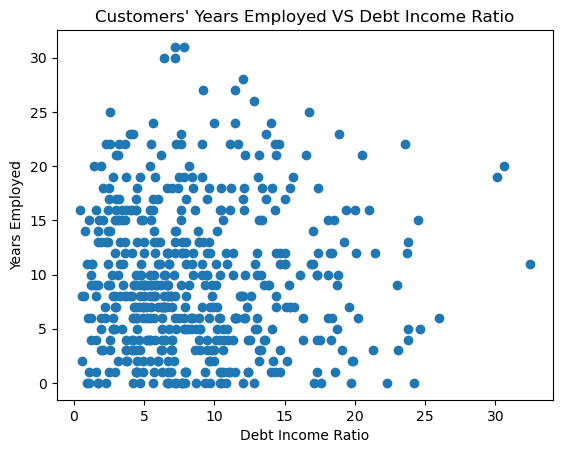

In [55]:
import matplotlib.pyplot as plt
plt.scatter(B_main_df['DebtIncomeRatio'], B_main_df['Years Employed'])
plt.xlabel('Debt Income Ratio')
plt.ylabel('Years Employed')
plt.title("Customers' Years Employed VS Debt Income Ratio")
plt.show()

#### 2. Perform k-means clustering, choosing two numerical features in your dataset, and apply k-means clustering to your data to create k clusters in Python (k>=2)

In [56]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 4).fit(B_main_df[['DebtIncomeRatio', 'Years Employed']])
kmean

KMeans(n_clusters=4)

#### 3. Visualise the data as well as the results of the k-means clustering, and describe your findings about the identified clusters.

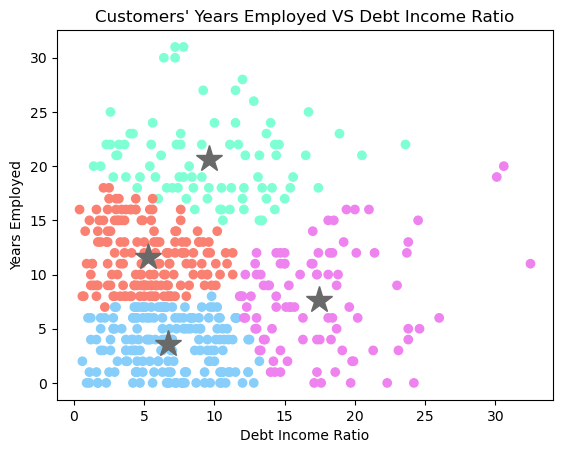

In [57]:
colors = ['salmon','lightskyblue','violet','aquamarine']
plt.scatter(B_main_df['DebtIncomeRatio'], B_main_df['Years Employed'],color=[colors[l_] for l_ in kmean.labels_])
# plt.scatter(B_main_df['DebtIncomeRatio'], B_main_df['Years Employed'],c= kmean.labels_)
plt.plot(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],'k*',markersize=20, c='dimgrey')
plt.xlabel('Debt Income Ratio')
plt.ylabel('Years Employed')
plt.title("Customers' Years Employed VS Debt Income Ratio")
plt.show()

From the graph shown above, we can group the customers into 4 clusters:

1. Right bottom cluster: 
* Characteristics: have the highest debt-income ratios with years employed varies from 0 to 20 years. 
* Interpretation: This group seems to have the highest risk due to their high debt relative to income. Their financial obligations are substantial indicating that despite stable employment. These customers should be prioritize the least. 

2. Left top cluster:
* Characteristics: have the wide spread in debt income ratio with high years employed, mostly above 20 years.
* Intepretation: This group suggests variability in financial magement dispite long-term employment. The high spread in debt income ratios indicates that risk varies significantly within the group. This group also represents a higher risk but may require individual assessments for accurate risk categorization.

3. Left bottom cluster:
* Characteristics: The red group clusters primarily with low years employed , which are below 10 years, and low debt-income ratios, up to around 15.
* Interpretation: These are likely newer entrants into the workforce with comparatively lower debt. The potential for increasing debt exists as they gain more employment years and possibly higher incomes. Monitoring and offering financial literacy could benefit this group as they mature in their careers.
4. Left middle cluster:
* Characteristics: This group features customers with medium years employed, around 10 to 20 years, and lower debt-income ratios, below 15.
* Interpretation: They seem to be in a stable phase of their careers, possibly with significant life purchases like homes and cars already made, reflected by their lower debt ratios. This group should be the most prioritized for new financial products as they exhibit financial stability and responsibility. They are likely the safest bet for additional credit offerings.

This clustering helps in planning strategies to manage customer relationships and risk more effectively. 